## Gradient Checking

Backpropagation computes the gradients $\frac{\partial J}{\partial \theta}$, where $\theta$ denotes the parameters of the model. $J$ is computed using forward propagation and your loss function.

Because forward propagation is relatively easy to implement, you're confident you got that right, and so you're almost 100% sure that you're computing the cost $J$ correctly. Thus, you can use your code for computing $J$ to verify the code for computing $\frac{\partial J}{\partial \theta}$.

Let's look back at the definition of a derivative (or gradient): $$ \frac{\partial J}{\partial \theta} = \lim_{\varepsilon \to 0} \frac{J(\theta + \varepsilon) - J(\theta - \varepsilon)}{2 \varepsilon} \tag{1}$$

If you're not familiar with the "$\displaystyle \lim_{\varepsilon \to 0}$" notation, it's just a way of saying "when $\varepsilon$ is really really small."

We know : $ \frac{\partial J}{\partial \theta} $ is what you want to make sure you're computing correctly.
You can compute $J(\theta + \varepsilon)$ and $J(\theta - \varepsilon)$ (in the case that $\theta$ is a real number), since you're confident your implementation for $J$ is correct.

Lets use equation (1) and a small value for $\varepsilon$ to convince ourselves that your code for computing $\frac{\partial J}{\partial \theta}$ is correct!

# 1 dimensional grad checks
#### Let's assume our linear function to be  $J(\theta) = \theta x$. The model contains only single real-valued parameter $ \theta $ and takes $ x $ as input  
#### We will compute $J(.)$ and it's derivative $ \frac{\partial J}{\partial \theta} $
#### Then we will check through our grad check , that the derivative computation is correct or not.

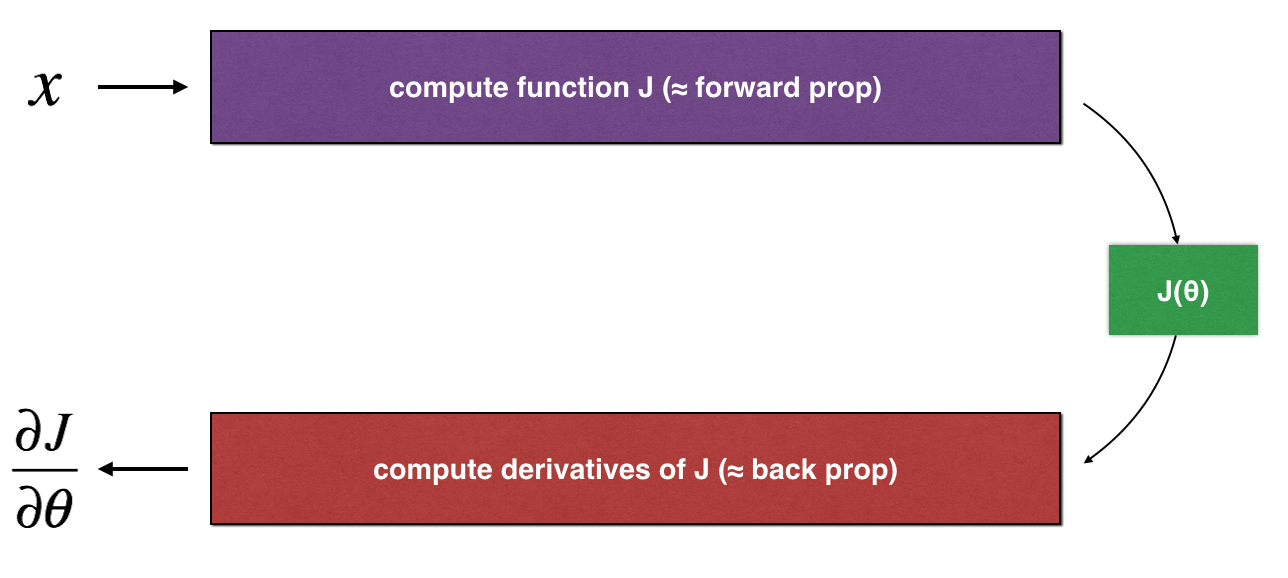

In [1]:
import numpy as np

In [2]:
# forward prop for the simple function 

In [3]:
def forward_prop(x,theta) : 
    J = theta * x
    return J

In [4]:
# backward prop to compute derivative of it

In [5]:
def backward_prop(x,theta) :
    dtheta = x
    return dtheta

#### Grad checking 

First compute "gradapprox" using the formula above (1) and a small value of $\varepsilon$. Here are the Steps to follow :  <br>
        1. $\theta^{+} = \theta + \varepsilon$<br>
        2. $\theta^{-} = \theta - \varepsilon$<br>
        3. $J^{+} = J(\theta^{+})$<br>
        4. $J^{-} = J(\theta^{-})$<br>
        5. $gradapprox = \frac{J^{+} - J^{-}}{2 \varepsilon}$<br>
        
 Then compute the gradient using backward propagation, and store the result in a variable "grad"
 Finally, compute the relative difference between "gradapprox" and the "grad" using the following formula: $$ difference = \frac {\mid\mid grad - gradapprox \mid\mid_2}{\mid\mid grad \mid\mid_2 + \mid\mid gradapprox \mid\mid_2} \tag{2}$$ 
You will need 3 Steps to compute this formula:<br>
        1. compute the numerator using np.linalg.norm(...)<br>
        2. compute the denominator. You will need to call np.linalg.norm(...) twice.<br>
        3. divide them.<br>
        
        
If this difference is small (say less than $10^{-7}$), you can be quite confident that you have computed your gradient correctly. Otherwise, there may be a mistake in the gradient computation.


In [6]:
# Gradient check
def gradient_check(x,theta,epsilon = 1e-7) : 
    
    thetaplus = theta + epsilon
    thetaminus = theta - epsilon
    J_plus = forward_prop(x,thetaplus)
    J_minus = forward_prop(x,thetaminus)
    
    # gradapprox calcuation
    gradapprox = (J_plus - J_minus)/(2 * epsilon)
    
    # Backward prop 
    grad = backward_prop(x,theta)
    
    # Let's compute the difference between our approx grad and grad from the output of backward_prop
    
    numerator = np.linalg.norm(grad - gradapprox)
    denominator = np.linalg.norm(grad) + np.linalg.norm(gradapprox)
    diff = numerator/denominator
    
    if diff < 1e-7 : 
        print("The gradient is correct, Hooray!!!")
    else:
        print("Oops! The gradient seems to be wrong.")
    return diff

In [7]:
x, theta = 2,4
difference = gradient_check(x,theta)
print("difference = " + str(difference))

The gradient is correct, Hooray!!!
difference = 2.919335883291695e-10


### N dimensional Gradient Checking 

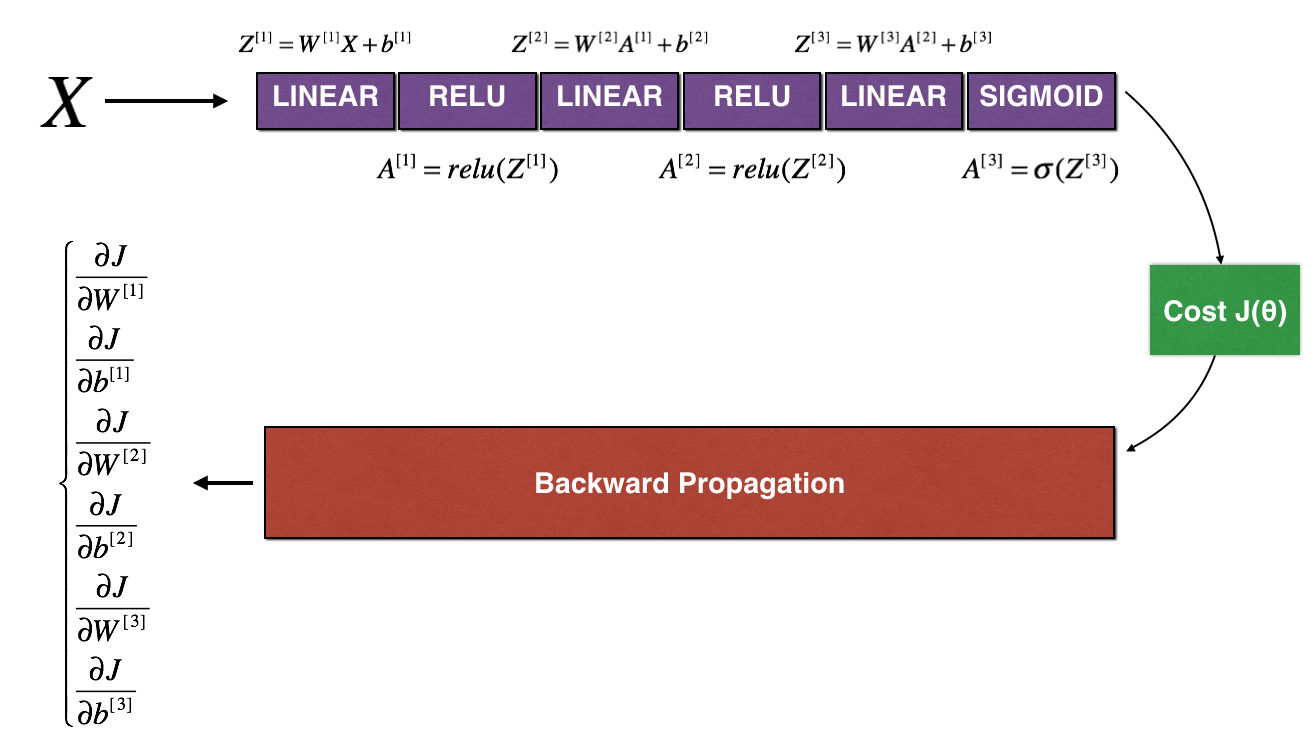

In [8]:
def forward_propogation(X,Y,params) :

   # retrieve parameters
    m = X.shape[1]
    W1 = parameters["w1"]
    b1 = parameters["b1"]
    W2 = parameters["w2"]
    b2 = parameters["b2"]
    W3 = parameters["w3"]
    b3 = parameters["b3"]

    # LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID
    Z1 = np.dot(W1, X) + b1
    A1 = relu(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = relu(Z2)
    Z3 = np.dot(W3, A2) + b3
    A3 = sigmoid(Z3)

    # Cost
    logprobs = np.multiply(-np.log(A3),Y) + np.multiply(-np.log(1 - A3), 1 - Y)
    cost = 1./m * np.sum(logprobs)
    
    cache = (Z1, A1, W1, b1, Z2, A2, W2, b2, Z3, A3, W3, b3)
    
    return cost, cache


In [9]:
def backward_propogation(X,Y,cache) :
    m = X.shape[1]
    (Z1, A1, W1, b1, Z2, A2, W2, b2, Z3, A3, W3, b3) = cache
    
    dZ3 = A3 - Y
    dW3 = 1./m * np.dot(dZ3, A2.T)
    db3 = 1./m * np.sum(dZ3, axis=1, keepdims = True)
    
    dA2 = np.dot(W3.T, dZ3)
    dZ2 = np.multiply(dA2, np.int64(A2 > 0))
    dW2 = 1./m * np.dot(dZ2, A1.T)
    db2 = 1./m * np.sum(dZ2, axis=1, keepdims = True)
    
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = np.multiply(dA1, np.int64(A1 > 0))
    dW1 = 1./m * np.dot(dZ1, X.T)
    db1 = 1./m * np.sum(dZ1, axis=1, keepdims = True)
    
    gradients = {"dz3": dZ3, "dw3": dW3, "db3": db3,
                 "da2": dA2, "dz2": dZ2, "dw2": dW2, "db2": db2,
                 "da1": dA1, "dz1": dZ1, "dw1": dW1, "db1": db1}
    
    return gradients


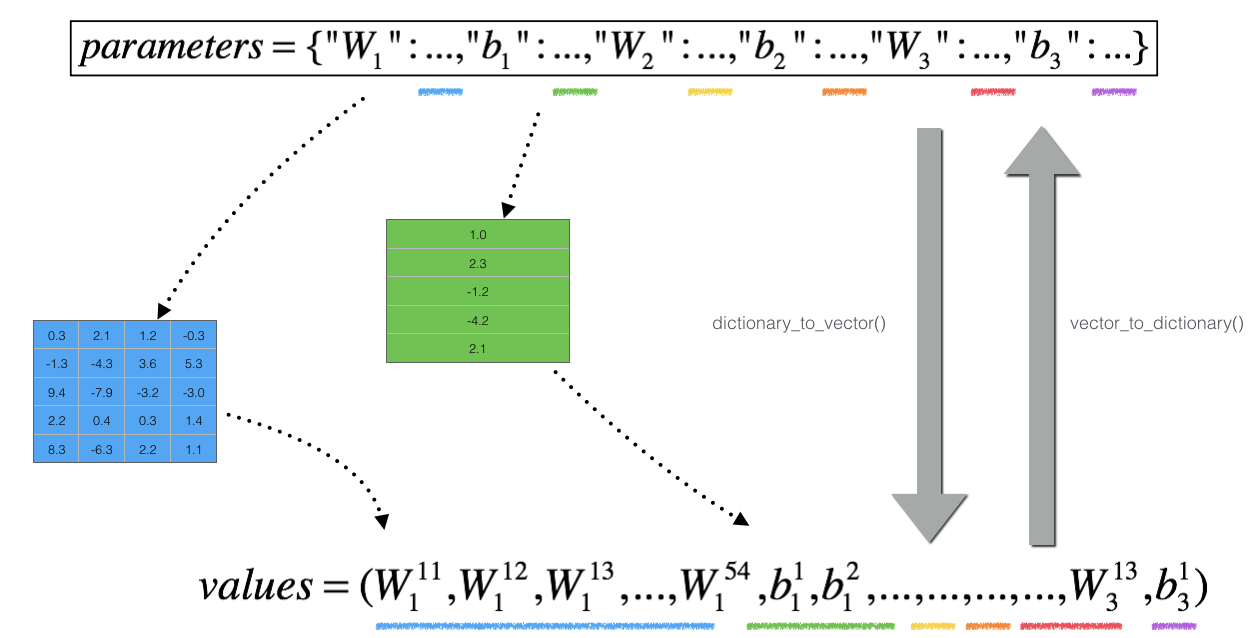

In [10]:
# helper functions

import numpy as np

def sigmoid(x):
    """
    Compute the sigmoid of x
    Arguments:
    x -- A scalar or numpy array of any size.
    Return:
    s -- sigmoid(x)
    """
    s = 1/(1+np.exp(-x))
    return s

def relu(x):
    """
    Compute the relu of x
    Arguments:
    x -- A scalar or numpy array of any size.
    Return:
    s -- relu(x)
    """
    s = np.maximum(0,x)
    
    return s


In [11]:
def dictionary_to_vector(params) :
    """
    convert the params dictionary into a single vector of required shape
    
    """
    
    keys = []
    count = 0
    for key in ["w1","b1","w2","b2","w3","b3"] : 
        
        new_Vec = np.reshape(params[key],(-1,1))
        keys = keys + [key] * new_Vec.shape[0]
        if count == 0 :
            theta = new_Vec
        else :
            theta = np.concatenate((theta,new_Vec),axis = 0)
        count = count + 1
    return theta,keys

In [12]:
def vector_to_dictonary(theta) : 
    """
    Unroll back our parameters dictionary from a single vector satisfying our specific required shape.
    """
    parameters = {}
    parameters["w1"] = theta[:20].reshape((5,4))
    parameters["b1"] = theta[20:25].reshape((5,1))
    parameters["w2"] = theta[25:40].reshape((3,5))
    parameters["b2"] = theta[40:43].reshape((3,1))
    parameters["w3"] = theta[43:46].reshape((1,3))
    parameters["b3"] = theta[46:47].reshape((1,1))

    return parameters

In [13]:
def gradients_to_vector(gradients):
    """
    Roll all our gradients dictionary into a single vector satisfying our specific required shape.
    """
    
    count = 0
    for key in ["dw1", "db1", "dw2", "db2", "dw3", "db3"]:
        # flatten parameter
        new_vector = np.reshape(gradients[key], (-1,1))
        
        if count == 0:
            theta = new_vector
        else:
            theta = np.concatenate((theta, new_vector), axis=0)
        count = count + 1

    return theta

## Gradient check 

In [20]:
def gradient_check_ndims(params,grads,X,Y,epsilon = 1e-7) :
    
    param_values,_ = dictionary_to_vector(params)
    grad = gradients_to_vector(grads)
    num_params = param_values.shape[0]
    J_plus = np.zeros((num_params,1))
    J_minus = np.zeros((num_params,1))
    gradapprox = np.zeros((num_params,1))
    
    # Compute gradapprox
    for i in range(num_params):
        
        # Compute J_plus[i]
        thetaplus = np.copy(param_values)
        thetaplus[i][0] += epsilon
        J_plus[i],_ = forward_propogation(X,Y,vector_to_dictonary(thetaplus))
        
        # Compute J_minus[i]
        thetaminus = np.copy(param_values)
        thetaminus[i][0] -= epsilon
        J_minus[i],_ = forward_propogation(X,Y,vector_to_dictonary(thetaminus))
        
        # Compute gradapprox
        gradapprox[i] = (J_plus[i] - J_minus[i])/(2*epsilon)
        
    numer = np.linalg.norm(grad-gradapprox)
    denom = np.linalg.norm(grad) + np.linalg.norm(gradapprox)
    diff = numer/denom
    
    if diff > 2e-7 :
        print("Oops! There seems a mistake in backward prop step, difference = " +str(diff))
    else :
        print("Hooray! The Backward prop step works perfectly, difference = " +str(diff))
    return diff

In [21]:
# a testcase generator
def gradient_check_n_test_case(): 
    np.random.seed(1)
    x = np.random.randn(4,3)
    y = np.array([1, 1, 0])
    W1 = np.random.randn(5,4) 
    b1 = np.random.randn(5,1) 
    W2 = np.random.randn(3,5) 
    b2 = np.random.randn(3,1) 
    W3 = np.random.randn(1,3) 
    b3 = np.random.randn(1,1) 
    parameters = {"w1": W1,
                  "b1": b1,
                  "w2": W2,
                  "b2": b2,
                  "w3": W3,
                  "b3": b3}

    
    return x, y, parameters

In [22]:
X, Y, parameters = gradient_check_n_test_case()
cost, cache = forward_propogation(X, Y, parameters)
gradients = backward_propogation(X, Y, cache)
difference = gradient_check_ndims(parameters, gradients, X, Y,1e-7)
print(difference)

Oops! There seems a mistake in backward prop step, difference = 1.0
1.0


### Some points to note : 

 
   1. Gradient Checking is slow! Approximating the gradient with  $\frac{\partial J}{\partial \theta} \approx \frac{J(\theta + \varepsilon) - J(\theta - \varepsilon)}{2 \varepsilon}$ is computationally costly. For this reason, we don't run gradient checking at every iteration during training. Just a few times to check if the gradient is correct.
   2. Gradient Checking, at least as we've presented it, doesn't work with dropout. You would usually run the gradient check algorithm without dropout to make sure your backprop is correct, then add dropout.

   3. Gradient checking verifies closeness between the gradients from backpropagation and the numerical approximation of the gradient (computed using forward propagation).
   4.  Gradient checking is slow, so we don't run it in every iteration of training. You would usually run it only to make sure your code is correct, then turn it off and use backprop for the actual learning process.
